In [708]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [709]:
# load weather data
# source: dwd (Deutscher Wetterdienst), 
weather_muc = pd.read_csv('mushroom_project/produkt_klima_tag_19540601_20191231_03379.csv')
weather_muc_current = pd.read_csv('mushroom_project/produkt_klima_tag_20190504_20201103_03379.txt', delimiter=';')

In [710]:
# get index of first of jan 2020
idx = weather_muc_current[weather_muc_current['MESS_DATUM'] == 20200101].index.values[0]
weather_muc = weather_muc.append(weather_muc_current[idx:], ignore_index=True)

In [711]:
weather_muc

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,3379,19540601,-999,-999.0,-999.0,1,0.0,1,-999.000,0,-999.0,-999.0,-999.00,14.0,-999.00,17.6,10.4,-999.0,eor
1,3379,19540602,-999,-999.0,-999.0,1,0.5,1,-999.000,0,-999.0,-999.0,-999.00,13.2,-999.00,19.7,9.7,-999.0,eor
2,3379,19540603,-999,-999.0,-999.0,1,0.0,1,-999.000,0,-999.0,-999.0,-999.00,16.6,-999.00,21.9,8.2,-999.0,eor
3,3379,19540604,-999,-999.0,-999.0,1,1.2,1,-999.000,0,-999.0,-999.0,-999.00,15.2,-999.00,17.3,11.8,-999.0,eor
4,3379,19540605,-999,-999.0,-999.0,1,6.0,1,-999.000,0,-999.0,-999.0,-999.00,15.2,-999.00,17.7,13.7,-999.0,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24258,3379,20201030,1,11.8,4.0,1,0.0,6,0.550,0,7.9,10.8,962.68,11.8,78.25,14.7,9.0,8.5,eor
24259,3379,20201031,1,4.9,1.8,1,0.0,0,8.867,0,4.4,10.4,961.95,12.2,74.54,17.9,6.3,4.5,eor
24260,3379,20201101,1,8.3,2.2,1,3.2,6,0.000,0,7.7,10.9,958.68,11.3,81.00,15.6,5.6,3.9,eor
24261,3379,20201102,1,10.7,3.0,1,0.0,6,1.667,0,7.5,13.5,957.73,17.4,67.75,21.5,14.5,12.0,eor


In [712]:
# load mushroom data
occurences = pd.read_csv('mushroom_project/shroom_db.csv')

In [713]:
occurences

,Mushroom,Date,Location,Latitude,Longitude,Documentation,Location details
0,Coprinus comatus,2016-09-29,Martinsried,NaN,NaN,Photo,NaN
1,Coprinus comatus,2017-08-31,Martinsried,NaN,NaN,Photo,NaN
2,Coprinus comatus,2017-09-26,Martinsried,NaN,NaN,Photo,NaN
3,Coprinus comatus,2017-10-07,Martinsried,NaN,NaN,Photo,NaN
4,Coprinus comatus,2018-09-19,Martinsried,NaN,NaN,Whatsapp,NaN
5,Coprinus comatus,2018-10-12,Effingham,NaN,NaN,Whatsapp,NaN
6,Coprinus comatus,2018-10-12,Martinsried,NaN,NaN,Whatsapp,NaN
7,Coprinus comatus,2018-10-20,Bozen,NaN,NaN,Photo,NaN
8,Coprinus comatus,2019-04-09,Lee holiday in France,NaN,NaN,Viber,NaN
9,Coprinus comatus,2019-08-14,Martinsried,NaN,NaN,Viber,NaN


In [714]:
def reformat_date(date):
    """ 
    Reformats the date string, removing the dashes
    
    Input: Date in the format 'yyyy-mm-dd' of type string
    Output: Date in the format 'yyyymmdd' of type int
    """
    
    return int(date[:4] + date[5:7] + date[8:10])

occurences['Date'] = occurences['Date'].apply(reformat_date)

In [715]:
mucdf = occurences[occurences['Location'] == 'Martinsried']
mucdf = mucdf.reset_index()


In [716]:
mucdf

,index,Mushroom,Date,Location,Latitude,Longitude,Documentation,Location details
0,0,Coprinus comatus,20160929,Martinsried,NaN,NaN,Photo,NaN
1,1,Coprinus comatus,20170831,Martinsried,NaN,NaN,Photo,NaN
2,2,Coprinus comatus,20170926,Martinsried,NaN,NaN,Photo,NaN
3,3,Coprinus comatus,20171007,Martinsried,NaN,NaN,Photo,NaN
4,4,Coprinus comatus,20180919,Martinsried,NaN,NaN,Whatsapp,NaN
5,6,Coprinus comatus,20181012,Martinsried,NaN,NaN,Whatsapp,NaN
6,9,Coprinus comatus,20190814,Martinsried,NaN,NaN,Viber,NaN
7,10,Coprinus comatus,20190901,Martinsried,NaN,NaN,Viber,NaN
8,12,Coprinus comatus,20190921,Martinsried,NaN,NaN,viber,NaN
9,14,Coprinus comatus,20200616,Martinsried,NaN,NaN,viber,NaN


In [717]:
n = mucdf.shape[0]

In [718]:
mucdf['Date']

0     20160929
1     20170831
2     20170926
3     20171007
4     20180919
5     20181012
6     20190814
7     20190901
8     20190921
9     20200616
10    20201025
Name: Date, dtype: int64

In [719]:
weather_muc.keys()

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_3', '  FX', '  FM', 'QN_4', ' RSK',
       'RSKF', ' SDK', 'SHK_TAG', '  NM', ' VPM', '  PM', ' TMK', ' UPM',
       ' TXK', ' TNK', ' TGK', 'eor'],
      dtype='object')

In [720]:
params = ['MESS_DATUM', ' TMK', ' TXK', ' TNK', ' TGK', ' SDK', ' RSK', '  NM', ' VPM', '  PM', ' UPM', ]
weather_muc = weather_muc[params]


In [721]:
weather_muc

,MESS_DATUM,TMK,TXK,TNK,TGK,SDK,RSK,NM,VPM,PM,UPM
0,19540601,14.0,17.6,10.4,-999.0,-999.000,0.0,-999.0,-999.0,-999.00,-999.00
1,19540602,13.2,19.7,9.7,-999.0,-999.000,0.5,-999.0,-999.0,-999.00,-999.00
2,19540603,16.6,21.9,8.2,-999.0,-999.000,0.0,-999.0,-999.0,-999.00,-999.00
3,19540604,15.2,17.3,11.8,-999.0,-999.000,1.2,-999.0,-999.0,-999.00,-999.00
4,19540605,15.2,17.7,13.7,-999.0,-999.000,6.0,-999.0,-999.0,-999.00,-999.00
...,...,...,...,...,...,...,...,...,...,...,...
24258,20201030,11.8,14.7,9.0,8.5,0.550,0.0,7.9,10.8,962.68,78.25
24259,20201031,12.2,17.9,6.3,4.5,8.867,0.0,4.4,10.4,961.95,74.54
24260,20201101,11.3,15.6,5.6,3.9,0.000,3.2,7.7,10.9,958.68,81.00
24261,20201102,17.4,21.5,14.5,12.0,1.667,0.0,7.5,13.5,957.73,67.75


In [722]:
M = pd.DataFrame(columns=params + ['ID'])

In [723]:
M

,MESS_DATUM,TMK,TXK,TNK,TGK,SDK,RSK,NM,VPM,PM,UPM,ID


In [724]:
for i in range(n): 
    print(i)
    idx = weather_muc[weather_muc['MESS_DATUM'] == mucdf['Date'][i]].index.values[0]
    m1 = weather_muc[idx-28:idx]
    m1.reset_index(inplace = True)
    m1['ID'] = i
    M = M.append(m1)

0
1
2
3
4
5
6
7
8
9
10


<ipython-input-724-76df45d71f59>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m1['ID'] = i


In [725]:
M[M == -999] = np.nan

In [726]:
M

,MESS_DATUM,TMK,TXK,TNK,TGK,SDK,RSK,NM,VPM,PM,UPM,ID,index
0,20160901,19.5,25.9,16.1,15.1,3.933,5.7,5.1,18.1,961.31,81.29,0,22738.0
1,20160902,20.2,26.3,15.2,14.1,10.000,0.0,2.3,15.7,960.40,69.42,0,22739.0
2,20160903,20.2,24.3,15.8,14.2,7.200,0.0,NaN,NaN,NaN,NaN,0,22740.0
3,20160904,20.3,25.1,16.0,14.8,5.000,31.3,NaN,NaN,NaN,NaN,0,22741.0
4,20160905,16.0,20.7,13.1,12.5,4.500,0.8,NaN,NaN,959.04,NaN,0,22742.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,20201020,7.7,15.8,1.3,0.2,7.233,0.0,7.2,7.9,955.78,77.63,10,24248.0
24,20201021,11.8,21.0,5.6,4.4,5.633,0.0,7.6,9.7,952.02,71.75,10,24249.0
25,20201022,13.1,17.2,8.8,6.5,2.517,0.2,7.6,10.2,956.69,68.67,10,24250.0
26,20201023,14.8,19.1,12.0,10.8,2.233,6.4,7.9,12.5,954.59,74.88,10,24251.0


In [727]:
t = np.arange(-27,1)

In [728]:
Mmean = pd.DataFrame(columns=M.columns)
Mstd = pd.DataFrame(columns=M.columns)

In [729]:
for i in range(28):
    xx = pd.DataFrame(M.loc[i].mean().values).transpose()
    xx.columns = M.columns
    Mmean = Mmean.append(xx, ignore_index = True)    
     

In [730]:
for i in range(28):
    xx = pd.DataFrame(M.loc[i].std().values).transpose()
    xx.columns = M.columns
    Mstd = Mstd.append(xx, ignore_index = True)    
     

In [731]:
def get_confi(mean, std, n, confidence = 0.95):
    i = confidence * std/np.sqrt(n)
    return mean + i, mean - i, i 

In [732]:
Mconfi_u, Mconfi_l, Mconfi = get_confi(Mmean, Mstd, n)

In [733]:
Mconfi_l[param]

0     10.855635
1     11.283704
2     11.361718
3     11.209593
4      9.801921
5      9.761314
6      9.618221
7      9.555537
8     10.583652
9      9.979167
10     8.525994
11     8.053812
12     8.117622
13     8.558017
14     9.092694
15     8.430524
16     7.823551
17     7.460905
18     8.094790
19     7.877403
20     8.066423
21     8.808847
22     8.771235
23     8.249581
24     8.144635
25     8.209538
26     9.150964
27     7.715436
Name:  TGK, dtype: float64

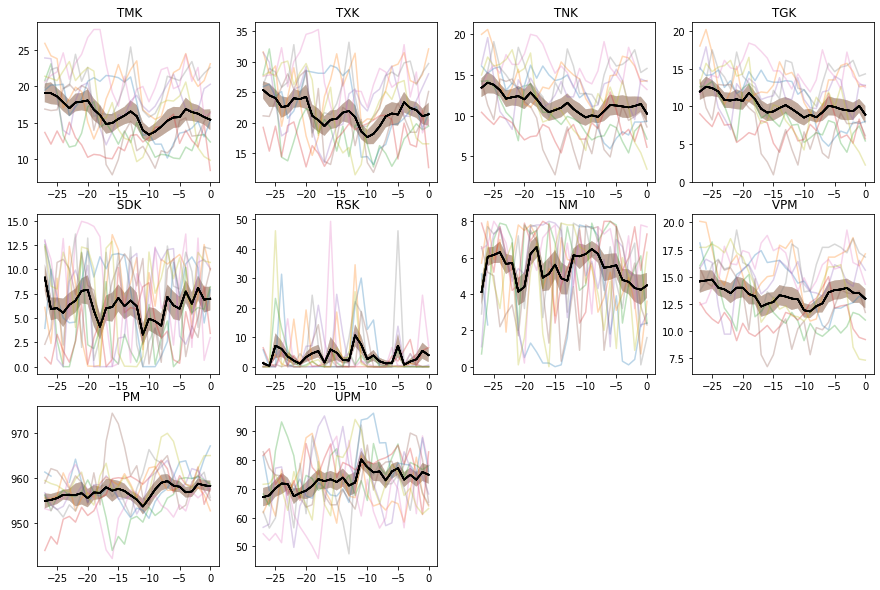

In [734]:
plt.figure(figsize = (15,10))
for p in range(1,len(params)):
    param = params[p]
    plt.subplot(3,4,p)
    for i in range(n-2):
        plt.fill_between(t, Mconfi_l[param], Mconfi_u[param], alpha = 0.1)
        plt.plot(t, M[M['ID'] == i][param],  alpha = 0.3)
        plt.title(param)
        plt.plot(t, Mmean[param], 'k')


In [817]:
import seaborn as sns
cmap = sns.diverging_palette(230, 30, l=65, center="light") #, as_cmap=True)
cmap = sns.color_palette("Spectral", n_colors = 5) #, as_cmap=True)


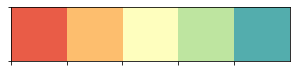

In [818]:
sns.palplot(cmap)

In [821]:
cmap = np.array(cmap)[[0,1,3,4]]

Text(0, 0.5, 'Temperature (°C)')

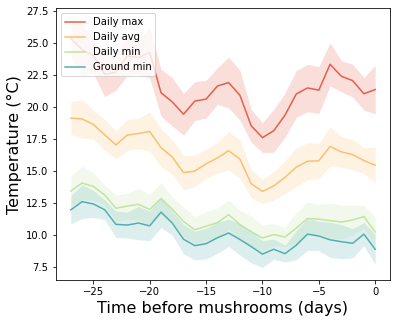

In [823]:
plt.figure(figsize = (6,5))
params_idxs = [2,1,3,4]
for p in range(1,5):
    p_ = params_idxs[p-1]
    param = params[p_]
    plt.plot(t, Mmean[param], color = cmap[p-1], linewidth = 1.5)
    plt.fill_between(t, Mconfi_l[param], Mconfi_u[param], color = cmap[p-1], alpha = 0.2, linewidth = 0)

legend = ['Daily max', 'Daily avg', 'Daily min', 'Ground min']

plt.legend(legend, loc = 'upper left')
plt.xlabel('Time before mushrooms (days)', fontsize = 16)
plt.ylabel('Temperature (°C)', fontsize = 16)


Text(0, 0.5, 'Precipitation (mm)')

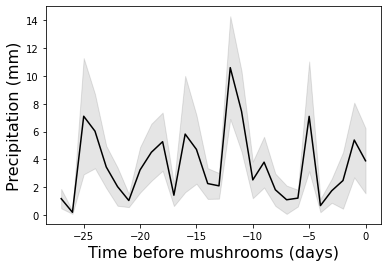

In [753]:
plt.plot(t, Mmean[' RSK'], 'K')
plt.fill_between(t, Mconfi_l[' RSK'], Mconfi_u[' RSK'], alpha = 0.1, color = 'k')

plt.xlabel('Time before mushrooms (days)', fontsize = 16)
plt.ylabel('Precipitation (mm)', fontsize = 16)

In [825]:
from datetime import datetime, timedelta


In [826]:
def convert_to_date(string, formatting = '%Y%m%d'): 
    return datetime.strptime(str(string), formatting)

In [827]:
weather_muc_x = weather_muc[['MESS_DATUM', ' TGK']]
weather_muc_x["MESS_DATUM"] = weather_muc_x["MESS_DATUM"].apply(convert_to_date)
weather_muc_x[weather_muc_x == -999] = np.nan

# get averages over the year 
firstday = convert_to_date(20190101)
avgtemp = []
year = []
for n in range(366):
    day = firstday + timedelta(n)
    year.append(day)
    avgtemp.append(weather_muc_x[(weather_muc_x["MESS_DATUM"].dt.month == day.month) & (weather_muc_x["MESS_DATUM"].dt.day == day.day)].mean())
    

M['MESS_DATUM_'] = M['MESS_DATUM'].apply(convert_to_date)
weather_muc['MESS_DATUM_'] = weather_muc['MESS_DATUM'].apply(convert_to_date)

<ipython-input-827-209fc660d9c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_muc_x["MESS_DATUM"] = weather_muc_x["MESS_DATUM"].apply(convert_to_date)
<ipython-input-827-209fc660d9c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_muc_x[weather_muc_x == -999] = np.nan
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2986: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

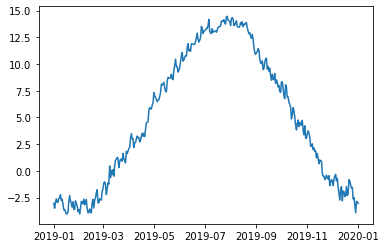

In [828]:
plt.plot(year, avgtemp)

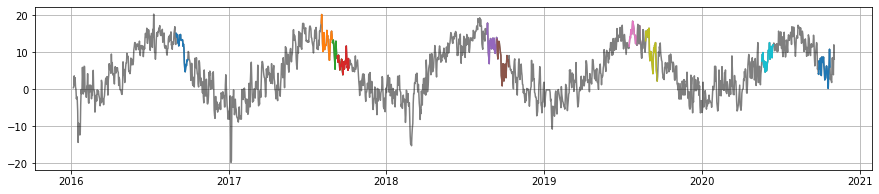

In [829]:
plt.figure(figsize = (15,3))
s = 22500
plt.plot(weather_muc['MESS_DATUM_'][s:], weather_muc[' TGK'][s:], 'k', alpha = 0.5)
#plt.plot(year, avgtemp)
for i in range(n-2):
    plt.plot(M[M['ID'] == i]['MESS_DATUM_'], M[M['ID'] == i][' TGK'])
plt.grid()

In [666]:
weather_muc_x = weather_muc[['MESS_DATUM', ' RSK']]
weather_muc_x["MESS_DATUM"] = weather_muc_x["MESS_DATUM"].apply(convert_to_date)

# get averages over the year 
firstday = convert_to_date(20190101)
RSK = []
for n in range(366):
    day = firstday + timedelta(n)
    RSK.append(weather_muc_x[(weather_muc_x["MESS_DATUM"].dt.month == day.month) & (weather_muc_x["MESS_DATUM"].dt.day == day.day)].mean())
    

M['MESS_DATUM_'] = M['MESS_DATUM'].apply(convert_to_date)
weather_muc['MESS_DATUM_'] = weather_muc['MESS_DATUM'].apply(convert_to_date)

<ipython-input-666-bd649ef77607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_muc_x["MESS_DATUM"] = weather_muc_x["MESS_DATUM"].apply(convert_to_date)
<ipython-input-666-bd649ef77607>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_muc['MESS_DATUM_'] = weather_muc['MESS_DATUM'].apply(convert_to_date)


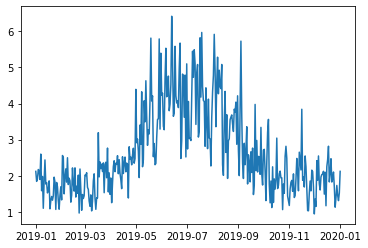

In [667]:
plt.plot(year, RSK)


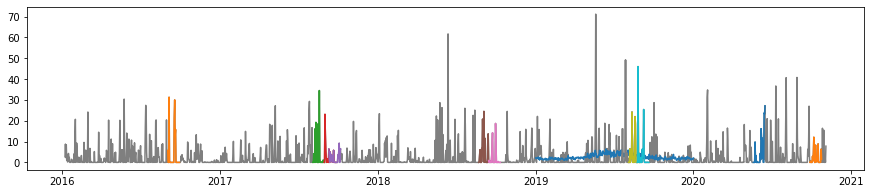

In [668]:
plt.figure(figsize = (15,3))
s = 22500
plt.plot(weather_muc['MESS_DATUM_'][s:], weather_muc[' RSK'][s:], 'k', alpha = 0.5)
plt.plot(year, RSK)
for i in range(n-2):
    plt.plot(M[M['ID'] == i]['MESS_DATUM_'], M[M['ID'] == i][' RSK'])
